<a href="https://colab.research.google.com/github/trinhminhtris/Linear-Regression/blob/main/AI_w7___17_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'mtcars.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


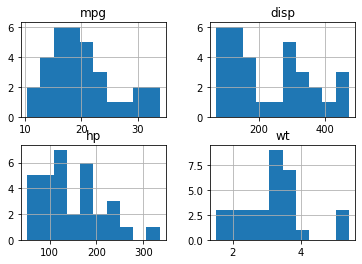

In [2]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [3]:
correlation = data.corr()
print(correlation)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


<Axes: >

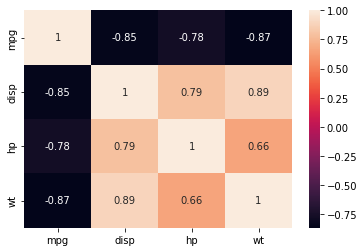

In [4]:
import seaborn as sns
sns.heatmap(correlation, annot = True)

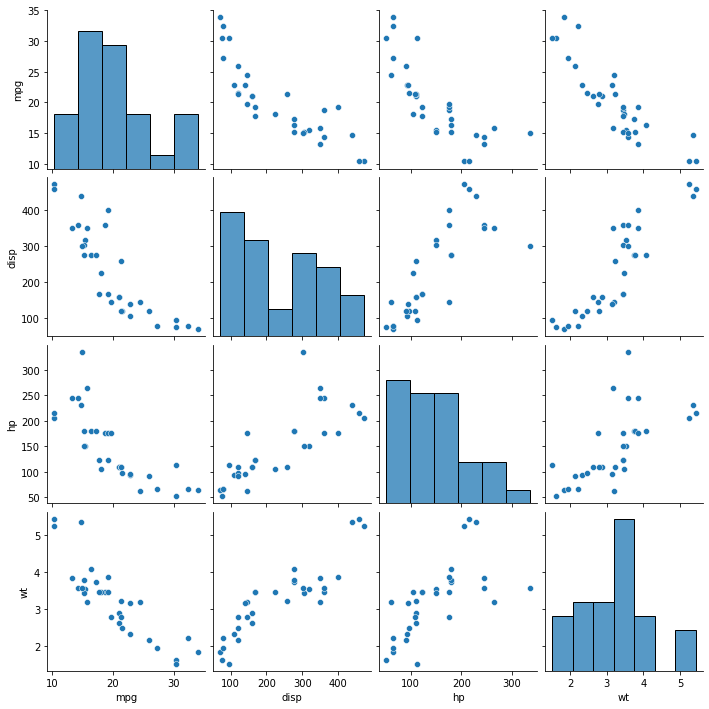

In [5]:
sns.pairplot(data)

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['wt']), y = data['mpg'])
print('Hệ số intercept là: ', model.intercept_)
print('Hệ số coefficient là: ', model.coef_)
model.score(X = pd.DataFrame(data['wt']), y = data['mpg'])

Hệ số intercept là:  37.28512616734204
Hệ số coefficient là:  [-5.34447157]


0.7528327936582646

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


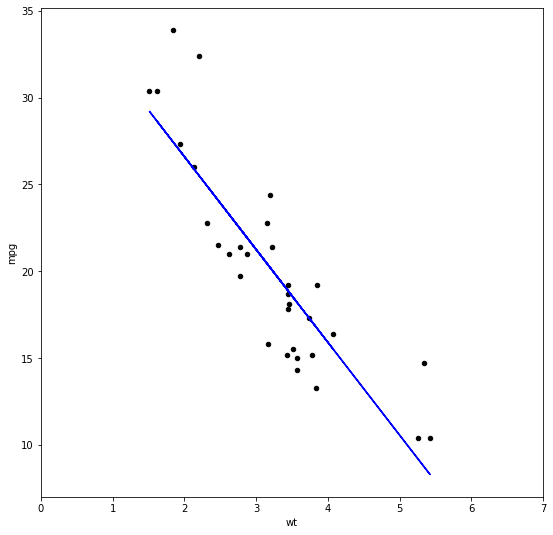

In [7]:
y_pred = model.predict(X = pd.DataFrame(data['wt']))
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9),
          color = 'black', xlim = (0,7))
plt.plot(data['wt'], y_pred, color = 'blue')

In [8]:
# Model bậc 2
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2]).T
model.fit(X, y = data['mpg'])
print('Intercept của mô hình: ', model.intercept_)
print('Coefficient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y = data['mpg']))

Intercept của mô hình:  49.93081094945181
Coefficient của mô hình:  [-13.38033708   1.17108689]
Độ chính xác của mô hình:  0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


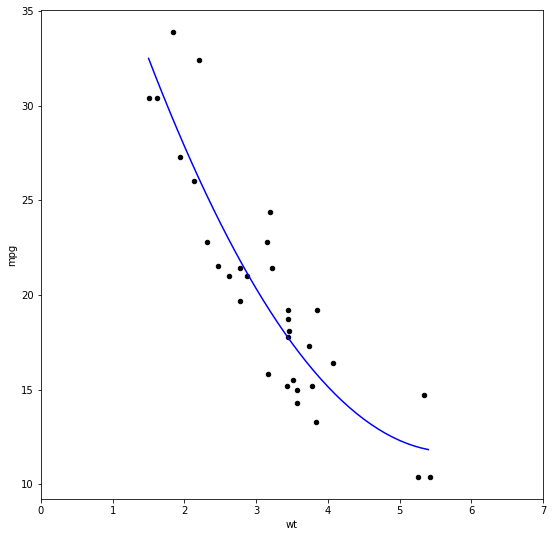

In [9]:
import numpy as np
range = np.arange(1.5, 5.5, 0.1)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9),
          color = 'black', xlim = (0,7))
plt.plot(range, y_pred, color = 'blue')

In [10]:
# Model bậc 10
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3, data['wt']**4, data['wt']**5,
                  data['wt']**6, data['wt']**7, data['wt']**8, data['wt']**9, data['wt']**10]).T
model.fit(X, y = data['mpg'])
print('Intercept của mô hình: ', model.intercept_)
print('Coefficient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y = data['mpg']))

Intercept của mô hình:  -14921.11995188375
Coefficient của mô hình:  [ 6.45813558e+04 -1.20086131e+05  1.26931928e+05 -8.46598454e+04
  3.73155199e+04 -1.10334755e+04  2.16590404e+03 -2.70730544e+02
  1.94974162e+01 -6.15515436e-01]
Độ chính xác của mô hình:  0.8702106571479111


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


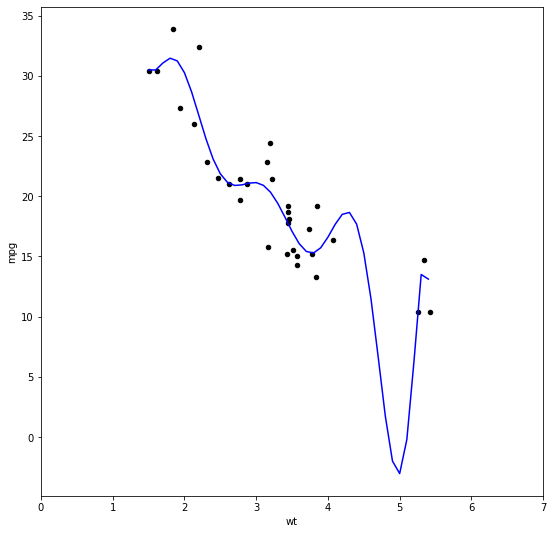

In [11]:
range = np.arange(1.5, 5.5, 0.1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6,
                         range**7,  range**8,  range**9,  range**10]).T
y_pred = model.predict(X = X_range)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9),
          color = 'black', xlim = (0,7))
plt.plot(range, y_pred, color = 'blue')

In [12]:
# Model đa thức 2 biến
model = linear_model.LinearRegression()
model.fit(X = data.loc[:, ['wt', 'hp']], y = data['mpg'])
print('Intercept của mô hình là: ', model.intercept_)
print('Coefficient của mô hình là: ', model.coef_)
print('Độ chính xác của mô hình là: ', model.score(X = data.loc[:, ['wt', 'hp']], y = data['mpg']))

Intercept của mô hình là:  37.227270116447215
Coefficient của mô hình là:  [-3.87783074 -0.03177295]
Độ chính xác của mô hình là:  0.8267854518827914


In [13]:
# Model đa thức 3 biến
model = linear_model.LinearRegression()
model.fit(X = data.loc[:, ['wt', 'hp', 'disp']], y = data['mpg'])
print('Intercept của mô hình là: ', model.intercept_)
print('Coefficient của mô hình là: ', model.coef_)
print('Độ chính xác của mô hình là: ', model.score(X = data.loc[:, ['wt', 'hp', 'disp']], y = data['mpg']))

Intercept của mô hình là:  37.10550526903184
Coefficient của mô hình là:  [-3.80089058e+00 -3.11565508e-02 -9.37009081e-04]
Độ chính xác của mô hình là:  0.8268361424946447


In [14]:
import pandas as pd
url_1 = '50_Startups.csv'
data_1 = pd.read_csv(url_1)
data_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
correlation_1 = data_1.corr()
print(correlation_1)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<Axes: >

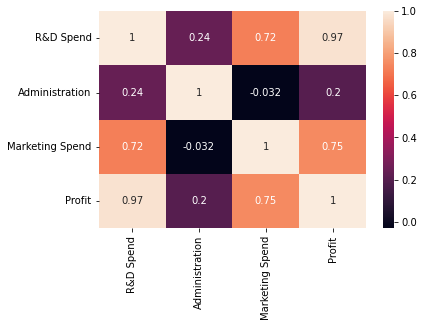

In [16]:
import seaborn as sns
sns.heatmap(correlation_1, annot = True)

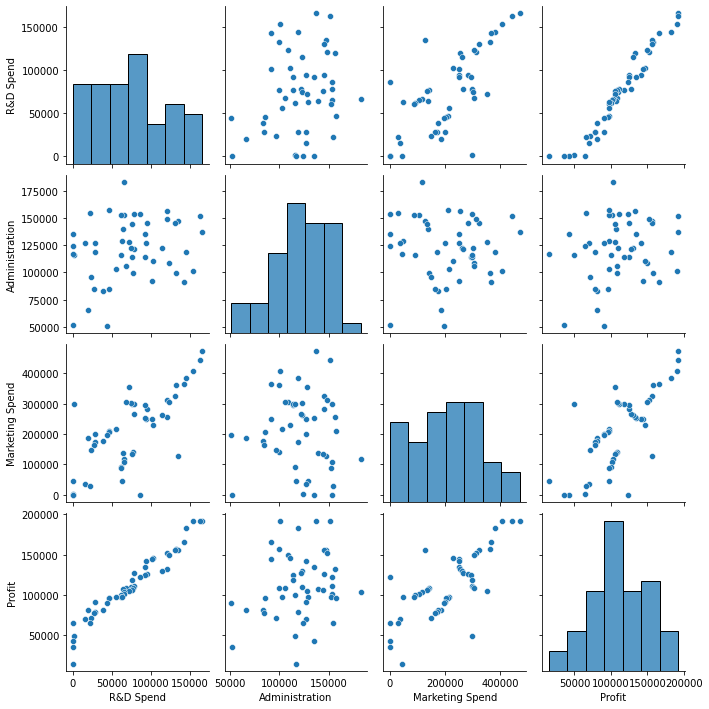

In [17]:
sns.pairplot(data_1)

In [19]:
# Model 1 biến bậc 1
from sklearn import linear_model
model_1 = linear_model.LinearRegression()
X = pd.DataFrame([data_1['R&D Spend']]).T
model_1.fit(X, y = data_1['Profit'])
print('Hệ số intercept là: ', model_1.intercept_)
print('Hệ số coefficient là: ', model_1.coef_)
model_1.score(X = pd.DataFrame(data_1['R&D Spend']), y = data_1['Profit'])

Hệ số intercept là:  49032.89914125215
Hệ số coefficient là:  [0.85429137]


0.9465353160804393

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


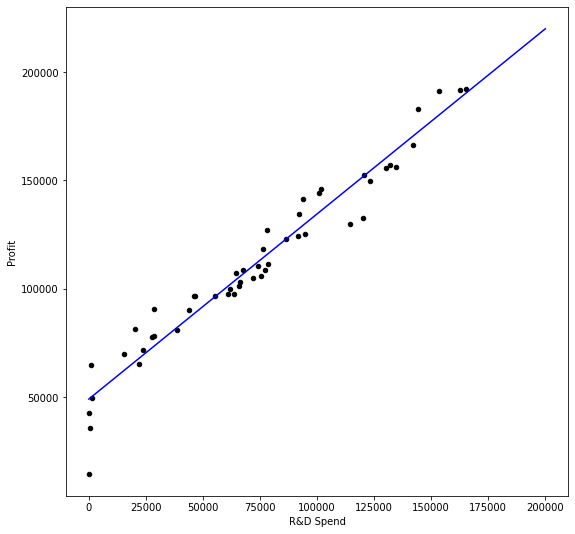

In [20]:
range = np.arange(1, 200000, 1)
X_range = pd.DataFrame([range]).T
y_pred = model_1.predict(X = X_range)
data_1.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [21]:
# Model 1 biến bậc 2
model_1 = linear_model.LinearRegression()
X = pd.DataFrame([data_1['R&D Spend'], data_1['R&D Spend']**2]).T
model_1.fit(X, y = data_1['Profit'])
print('Hệ số intercept là: ', model_1.intercept_)
print('Hệ số coefficient là: ', model_1.coef_)
print('Độ chính xác của mô hình: ', model_1.score(X, y = data_1['Profit']))

Hệ số intercept là:  48128.14916956878
Hệ số coefficient là:  [ 8.90147291e-01 -2.31821806e-07]
Độ chính xác của mô hình:  0.946703652909133


In [22]:
# Model 1 biến bậc 3
model_1 = linear_model.LinearRegression()
X = pd.DataFrame([data_1['R&D Spend'], data_1['R&D Spend']**2, data_1['R&D Spend']**3]).T
model_1.fit(X, y = data_1['Profit'])
print('Hệ số intercept là: ', model_1.intercept_)
print('Hệ số coefficient là: ', model_1.coef_)
print('Độ chính xác của mô hình: ', model_1.score(X, y = data_1['Profit']))

Hệ số intercept là:  43108.76756818297
Hệ số coefficient là:  [ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]
Độ chính xác của mô hình:  0.9540709421464032


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


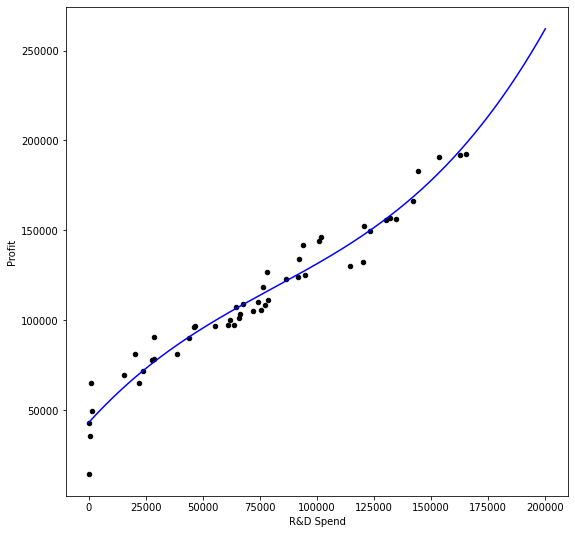

In [24]:
range = np.arange(1, 200000, 1)
X_range = pd.DataFrame([range, range**2, range**3]).T
y_pred = model_1.predict(X = X_range)
data_1.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [25]:
# Model đa thức 2 biến
model_1 = linear_model.LinearRegression()
model_1.fit(X = data_1.loc[:, ['R&D Spend', 'Administration']], y = data_1['Profit'])
print('Intercept của mô hình là: ', model_1.intercept_)
print('Coefficient của mô hình là: ', model_1.coef_)
print('Độ chính xác của mô hình là: ', model_1.score(X = data_1.loc[:, ['R&D Spend', 'Administration']], y = data_1['Profit']))

Intercept của mô hình là:  54886.62062756297
Coefficient của mô hình là:  [ 0.86211798 -0.05299543]
Độ chính xác của mô hình là:  0.9478129385009173


In [26]:
# Model đa thức 3 biến
model_1 = linear_model.LinearRegression()
model_1.fit(X = data_1.loc[:, ['R&D Spend', 'Administration', 'Marketing Spend']], y = data_1['Profit'])
print('Intercept của mô hình là: ', model_1.intercept_)
print('Coefficient của mô hình là: ', model_1.coef_)
print('Độ chính xác của mô hình là: ', model_1.score(X = data_1.loc[:, ['R&D Spend', 'Administration', 'Marketing Spend']], y = data_1['Profit']))

Intercept của mô hình là:  50122.19298986524
Coefficient của mô hình là:  [ 0.80571505 -0.02681597  0.02722806]
Độ chính xác của mô hình là:  0.9507459940683246


In [27]:
import pandas as pd
url_2 = 'Advertising.csv'
data_2 = pd.read_csv(url_2)
data_2.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [28]:
correlation_2 = data_2.corr()
print(correlation_2)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


<Axes: >

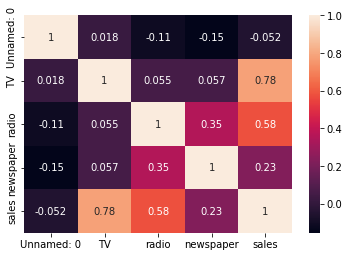

In [29]:
import seaborn as sns
sns.heatmap(correlation_2, annot = True)

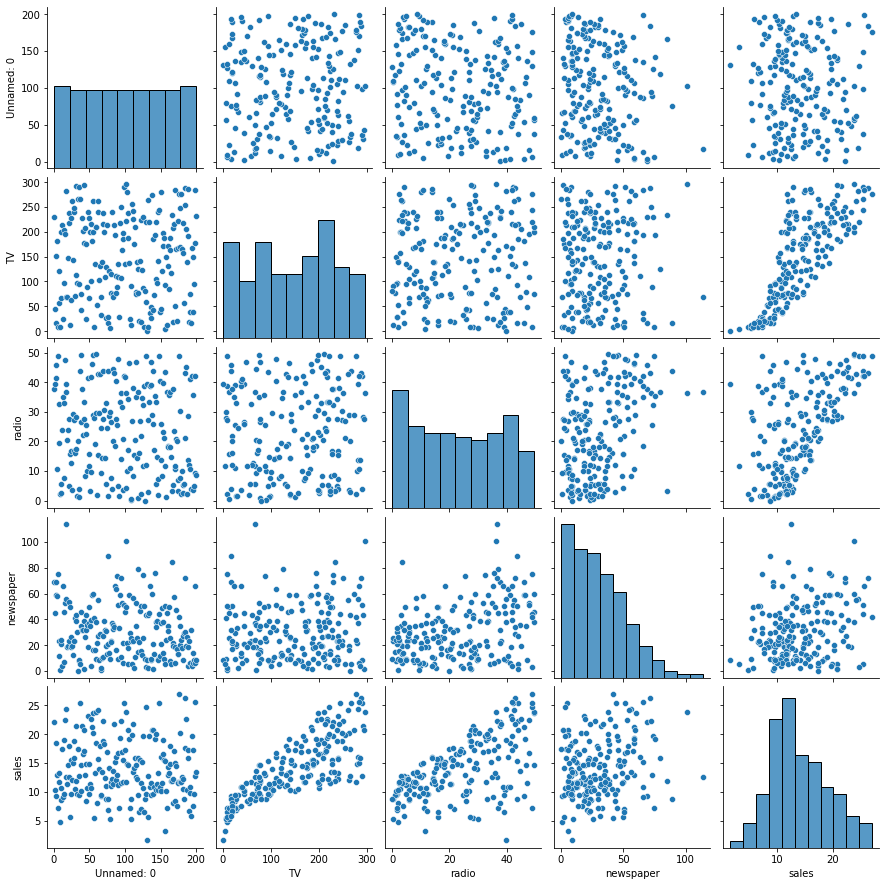

In [30]:
sns.pairplot(data_2)

In [31]:
# Model 1 biến bậc 1
from sklearn import linear_model
model_2 = linear_model.LinearRegression()
X = pd.DataFrame([data_2['TV']]).T
model_2.fit(X, y = data_2['sales'])
print('Hệ số intercept là: ', model_2.intercept_)
print('Hệ số coefficient là: ', model_2.coef_)
model_2.score(X = pd.DataFrame(data_2['TV']), y = data_2['sales'])

Hệ số intercept là:  7.032593549127695
Hệ số coefficient là:  [0.04753664]


0.611875050850071

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


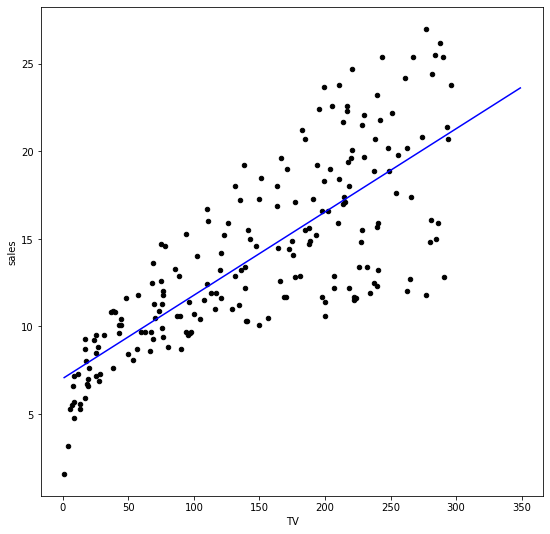

In [32]:
range = np.arange(1, 350, 1)
X_range = pd.DataFrame([range]).T
y_pred = model_2.predict(X = X_range)
data_2.plot(kind = 'scatter', x = 'TV', y = 'sales', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [33]:
# Model 1 biến bậc 2
model_2 = linear_model.LinearRegression()
X = pd.DataFrame([data_2['TV'], data_2['TV']**2]).T
model_2.fit(X, y = data_2['sales'])
print('Hệ số intercept là: ', model_2.intercept_)
print('Hệ số coefficient là: ', model_2.coef_)
print('Độ chính xác của mô hình: ', model_2.score(X, y = data_2['sales']))

Hệ số intercept là:  6.1141201283331075
Hệ số coefficient là:  [ 6.72659270e-02 -6.84693373e-05]
Độ chính xác của mô hình:  0.6190371168872755


In [39]:
# Model 1 biến bậc 6
from sklearn import linear_model
import pandas as pd
model_2 = linear_model.LinearRegression()
X = pd.DataFrame([data_2['TV'], data_2['TV']**2, data_2['TV']**3, data_2['TV']**4,
                  data_2['TV']**5, data_2['TV']**6]).T
model_2.fit(X, y = data_2['sales'])
print('Hệ số intercept là: ', model_2.intercept_)
print('Hệ số coefficient là: ', model_2.coef_)
print('Độ chính xác của mô hình: ', model_2.score(X, y = data_2['sales']))

Hệ số intercept là:  3.102716603611796
Hệ số coefficient là:  [ 3.20782063e-01 -5.67064291e-03  5.26589322e-05 -2.38512694e-07
  5.06399495e-10 -3.94395454e-13]
Độ chính xác của mô hình:  0.629177812047104


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


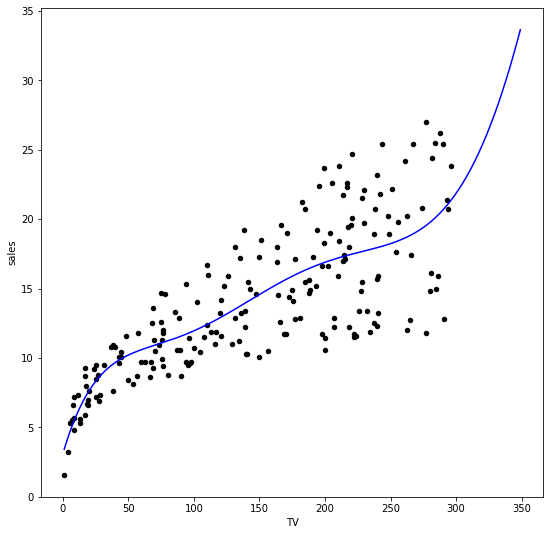

In [40]:
range = np.arange(1, 350, 1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6]).T
y_pred = model_2.predict(X = X_range)
data_2.plot(kind = 'scatter', x = 'TV', y = 'sales', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [41]:
# Model đa thức 2 biến
model_2 = linear_model.LinearRegression()
model_2.fit(X = data_2.loc[:, ['TV', 'newspaper']], y = data_2['sales'])
print('Intercept của mô hình là: ', model_2.intercept_)
print('Coefficient của mô hình là: ', model_2.coef_)
print('Độ chính xác của mô hình là: ', model_2.score(X = data_2.loc[:, ['TV', 'newspaper']], y = data_2['sales']))

Intercept của mô hình là:  5.7749479679116344
Coefficient của mô hình là:  [0.04690121 0.04421942]
Độ chính xác của mô hình là:  0.6458354938293271


In [45]:
# Model đa thức 3 biến
model_2 = linear_model.LinearRegression()
model_2.fit(X = data_2.loc[:, ['TV', 'newspaper', 'radio']], y = data_2['sales'])
print('Intercept của mô hình là: ', model_2.intercept_)
print('Coefficient của mô hình là: ', model_2.coef_)
print('Độ chính xác của mô hình là: ', model_2.score(X = data_2.loc[:, ['TV', 'newspaper', 'radio']], y = data_2['sales']))

Intercept của mô hình là:  2.938889369459412
Coefficient của mô hình là:  [ 0.04576465 -0.00103749  0.18853002]
Độ chính xác của mô hình là:  0.8972106381789521


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url_3 = 'insurance.csv'
data_3 = pd.read_csv(url_3)
data_3.sample(5)

,age,sex,bmi,children,smoker,region,charges
615,47,female,36.630,1,yes,southeast,42969.85270
905,26,female,29.355,2,no,northeast,4564.19145
27,55,female,32.775,2,no,northwest,12268.63225
370,61,female,21.090,0,no,northwest,13415.03810
654,59,female,35.200,0,no,southeast,12244.53100


In [2]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


male      676
female    662
Name: sex, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

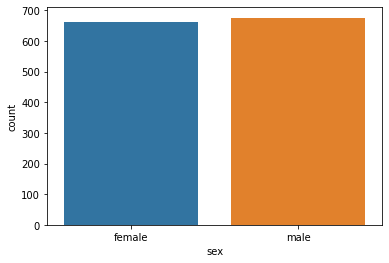

In [3]:
print(data_3['sex'].value_counts())
sns.countplot(x = 'sex', data = data_3)

no     1064
yes     274
Name: smoker, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

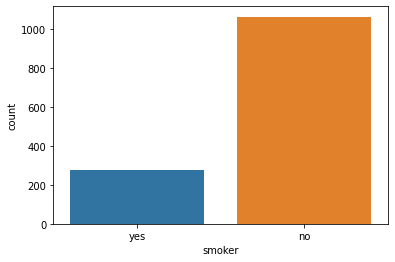

In [4]:
print(data_3['smoker'].value_counts())
sns.countplot(x = 'smoker', data = data_3)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<Axes: xlabel='region', ylabel='count'>

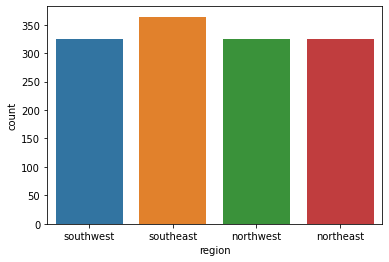

In [5]:
print(data_3['region'].value_counts())
sns.countplot(x = 'region', data = data_3)

<Axes: >

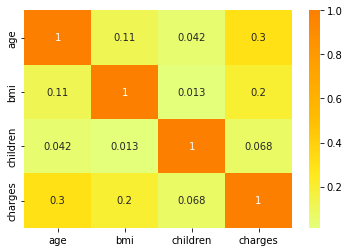

In [6]:
corr = data_3.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

In [9]:
# Model 1 biến bậc 1
from sklearn import linear_model
model_3 = linear_model.LinearRegression()
X = pd.DataFrame([data_3['age']]).T
model_3.fit(X, y = data_3['charges'])
print('Hệ số intercept là: ', model_3.intercept_)
print('Hệ số coefficient là: ', model_3.coef_)
model_3.score(X = pd.DataFrame(data_3['age']), y = data_3['charges'])

Hệ số intercept là:  3165.885006063021
Hệ số coefficient là:  [257.72261867]


0.08940589967885804

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


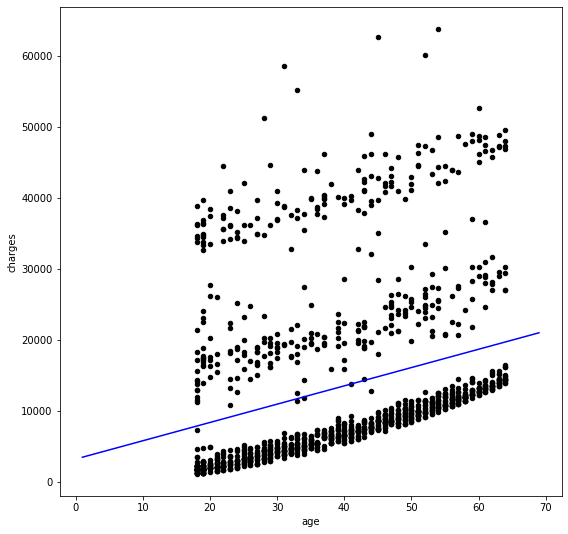

In [10]:
range = np.arange(1, 70, 1)
X_range = pd.DataFrame([range]).T
y_pred = model_3.predict(X = X_range)
data_3.plot(kind = 'scatter', x = 'age', y = 'charges', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [11]:
# Model 1 biến bậc 2
model_3 = linear_model.LinearRegression()
X = pd.DataFrame([data_3['age'], data_3['age']**2]).T
model_3.fit(X, y = data_3['charges'])
print('Hệ số intercept là: ', model_3.intercept_)
print('Hệ số coefficient là: ', model_3.coef_)
print('Độ chính xác của mô hình: ', model_3.score(X, y = data_3['charges']))

Hệ số intercept là:  6508.552679699116
Hệ số coefficient là:  [64.57305277  2.43890871]
Độ chính xác của mô hình:  0.09059354818621057


In [29]:
# Model 1 biến bậc 12
model_3 = linear_model.LinearRegression()
X = pd.DataFrame([data_3['age'], data_3['age']**2, data_3['age']**3, data_3['age']**4,
                  data_3['age']**5, data_3['age']**6, data_3['age']**7, data_3['age']**8,
                  data_3['age']**9, data_3['age']**10, data_3['age']**11, data_3['age']**12]).T
model_3.fit(X, y = data_3['charges'])
print('Hệ số intercept là: ', model_3.intercept_)
print('Hệ số coefficient là: ', model_3.coef_)
print('Độ chính xác của mô hình: ', model_3.score(X, y = data_3['charges']))

Hệ số intercept là:  5720.74961459504
Hệ số coefficient là:  [ 1.41884822e-07  1.17696876e-05  1.19646858e-04  1.35094272e-03
  1.09294164e-02 -1.09723469e-03  4.42363837e-05 -8.88920930e-07
  8.86667507e-09 -3.50523770e-11 -7.91416764e-17  1.00237879e-16]
Độ chính xác của mô hình:  0.09410110819718664


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


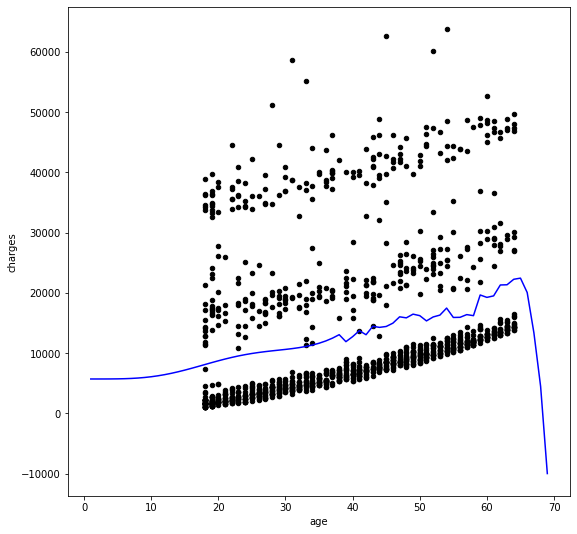

In [28]:
range = np.arange(1, 70, 1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6, range**7,
                        range**8, range**9, range**10, range**11, range**12]).T
y_pred = model_3.predict(X = X_range)
data_3.plot(kind = 'scatter', x = 'age', y = 'charges', figsize = (9,9),
          color = 'black')
plt.plot(range, y_pred, color = 'blue')

In [31]:
# Model đa thức 2 biến
model_3 = linear_model.LinearRegression()
model_3.fit(X = data_3.loc[:, ['age', 'bmi']], y = data_3['charges'])
print('Intercept của mô hình là: ', model_3.intercept_)
print('Coefficient của mô hình là: ', model_3.coef_)
print('Độ chính xác của mô hình là: ', model_3.score(X = data_3.loc[:, ['age', 'bmi']], y = data_3['charges']))

Intercept của mô hình là:  -6424.804612240769
Coefficient của mô hình là:  [241.9307779  332.96509081]
Độ chính xác của mô hình là:  0.11718338606939938


In [34]:
# Model đa thức 3 biến
model_3 = linear_model.LinearRegression()
model_3.fit(X = data_3.loc[:, ['age', 'bmi', 'children']], y = data_3['charges'])
print('Intercept của mô hình là: ', model_3.intercept_)
print('Coefficient của mô hình là: ', model_3.coef_)
print('Độ chính xác của mô hình là: ', model_3.score(X = data_3.loc[:, ['age', 'bmi', 'children']], y = data_3['charges']))

Intercept của mô hình là:  -6916.243347787033
Coefficient của mô hình là:  [239.99447429 332.0833645  542.86465225]
Độ chính xác của mô hình là:  0.12009819576246927
